<a href="https://colab.research.google.com/github/matthew11xf/MATH4194/blob/main/MATH4194Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Simple Linear Regression on Simulated Data

In this task, we fit a linear regression to three simulated datasets, with three different levels of noise in the data.

Noise Level = 0.1, MSE =  0.0080
Noise Level = 0.5, MSE =  0.3998
Noise Level = 2.0, MSE =  4.8089


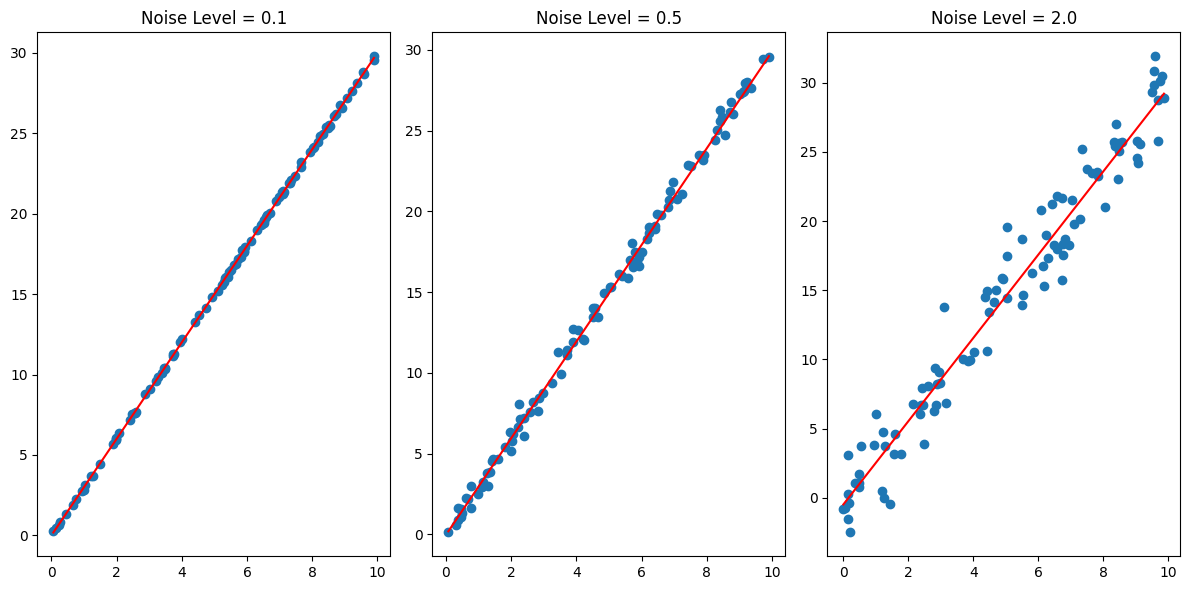

In [17]:
# Task 1: Simple Linear Regression on Simulated Data

import numpy as np
import matplotlib.pyplot as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to generate synthetic linear data
def generate_linear_data(N, var):
    # Create a random number generator
    rng = np.random.default_rng()
    # Create an ordered list of x values
    X = rng.uniform(0, 10, N)
    X.sort()
    # Calculate y values with noise
    y = 3*X + rng.normal(0, var, N)
    return X.reshape(-1, 1), y

# Different noise levels to test
noise_levels = [0.1, 0.5, 2.0]

# Initialize plot
pp.figure(figsize=(12, 6))

# Fit and plot a linear regression for each dataset
for i, noise in enumerate(noise_levels, 1):
    # Generate synthetic data
    X, y = generate_linear_data(100, noise)

    # Create 80/20 train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Noise Level = {noise}, MSE = {mse: .4f}")

    # Plot data and regression line
    pp.subplot(1, 3, i)
    pp.scatter(X, y)
    pp.plot(X, model.predict(X), color='red')
    pp.title(f"Noise Level = {noise}")

pp.tight_layout()
pp.show()


**Task 1 Summary**

As we can see in the results above, the regression line fits the data better if there is less noise. As the noise is increased, the mean squared error of the regression line increases.

# Task 2: Polynomial Regression and Regularization

In this task, we generate a synthetic dataset representing a quadratic (degree 2 polynomial) relationship. We fit four different models to the data: a linear model, a quadratic model (unregularized), a regularized Ridge regression model, and regularized Lasso regression model. The Ridge and Lasso models each have a hyperparameter called alpha. We use five-fold cross-validation to select a value for alpha for each model.



Noise Level = 10.0
  Linear Model MSE = 169.0247
  Quadratic Model MSE = 74.2368
  Ridge Regression MSE = 82.9916
  Lasso Regression MSE = 89.1104



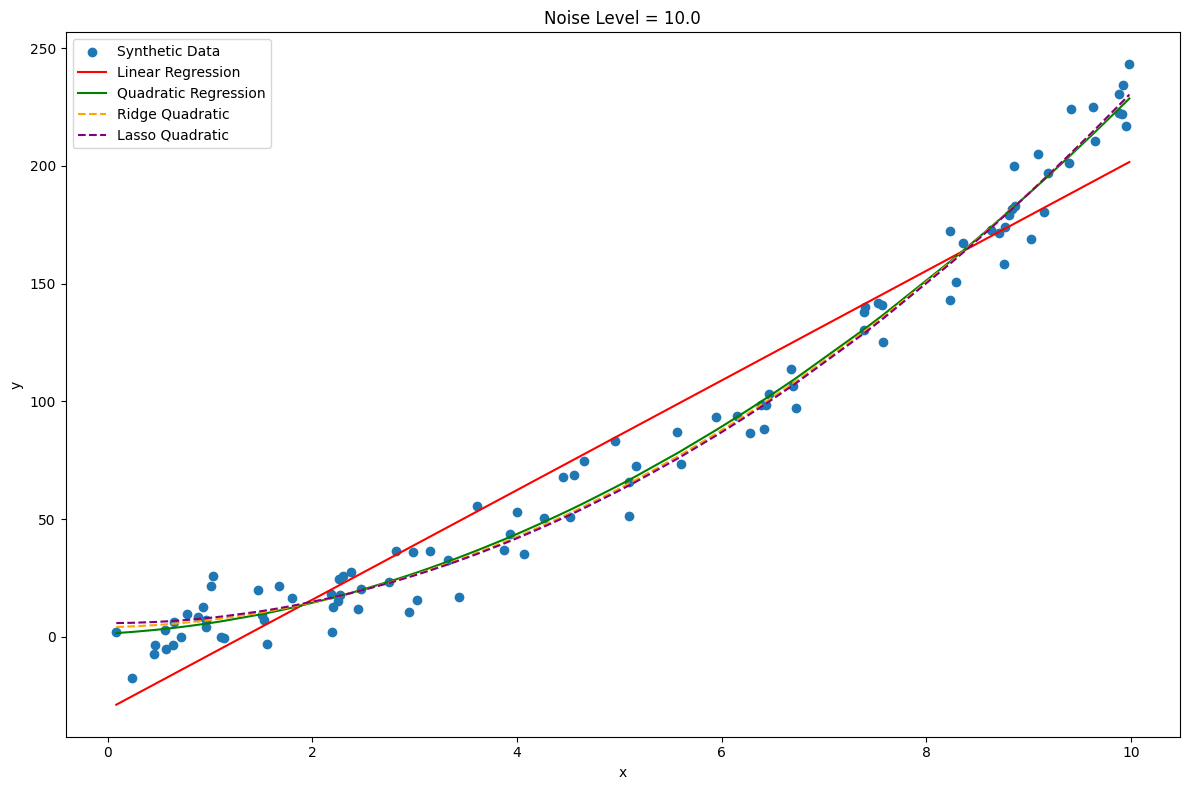

In [18]:
# Task 2: Polynomial Regression and Regularization

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Function to generate synthetic quadratic data
def generate_quadratic_data(N, var):
    # Create a random number generator
    rng = np.random.default_rng()
    # Create an ordered list of x values
    X = rng.uniform(0, 10, N)
    X.sort()
    # Calculate y values with noise
    y = 2*X**2 + 3*X + rng.normal(0, var, N)
    return X.reshape(-1, 1), y

# For this task, we'll only use one noise level
noise = 10.0
# Alpha values to test for Ridge and Lasso
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Initialize plot
pp.figure(figsize=(12, 8))

# Generate data
X, y = generate_quadratic_data(100, noise)

# Create 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear model
linear_model = LinearRegression()
# Fit the linear model
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Create quadratic polynomial features
poly_features = PolynomialFeatures(degree=2)

# Create an unregularized quadratic model
quadratic_model = make_pipeline(poly_features, LinearRegression())
# Fit the quadratic model
quadratic_model.fit(X_train, y_train)
# Predict on the test set
y_pred_quadratic = quadratic_model.predict(X_test)
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)


# RIDGE REGRESSION
# Objective: ||Xw - y||^2 + alpha*||w||^2

# Create a ridge model, using 5-fold CV to select the best alpha
ridge_model = make_pipeline(poly_features, RidgeCV(alphas = alpha_values, cv = 5))
# Fit the ridge model
ridge_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_ridge = ridge_model.predict(X_test)
# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


# LASSO REGRESSION
# Objective: (1/(2*N))*||Xw - y||^2 + alpha*|w|

# Create a lasso model, using 5-fold CV to choose the best alpha
lasso_model = make_pipeline(poly_features, LassoCV(alphas = alpha_values, cv = 5))
# Fit the lasso model
lasso_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_lasso = lasso_model.predict(X_test)
# Calculate mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print results
print(f"Noise Level = {noise}")
print(f"  Linear Model MSE = {mse_linear:.4f}")
print(f"  Quadratic Model MSE = {mse_quadratic:.4f}")
print(f"  Ridge Regression MSE = {mse_ridge:.4f}")
print(f"  Lasso Regression MSE = {mse_lasso:.4f}\n")

# Plot data and regression lines
pp.scatter(X, y, label='Synthetic Data')
pp.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
pp.plot(X, quadratic_model.predict(X), color='green', label='Quadratic Regression')
pp.plot(X, ridge_model.predict(X), color='orange', linestyle='dashed', label='Ridge Quadratic')
pp.plot(X, lasso_model.predict(X), color='purple', linestyle='dashed', label='Lasso Quadratic')
pp.title(f"Noise Level = {noise}")
pp.xlabel('x')
pp.ylabel('y')
pp.legend()
pp.tight_layout()
pp.show()


Here it is easily seen that the linear model is a bad fit for the data, while all three of the quadratic models fit the data better. The mean squared errors for the unregularized, Ridge, and Lasso quadratic models are not very different, and the graphs of the three curves are visibly similar. The distribution of the noise in the data does not tend to produce outliers which would lead to significantly different results for unregularized and regularized models.

Next, we will see what happens if the hyperparameter alpha for the Ridge and Lasso models is set to a much greater value.

Noise Level = 10.0
  Linear Model MSE = 176.0804
  Quadratic Model MSE = 65.8542
  Ridge Regression MSE = 77.4242
  Lasso Regression MSE = 1216.4724



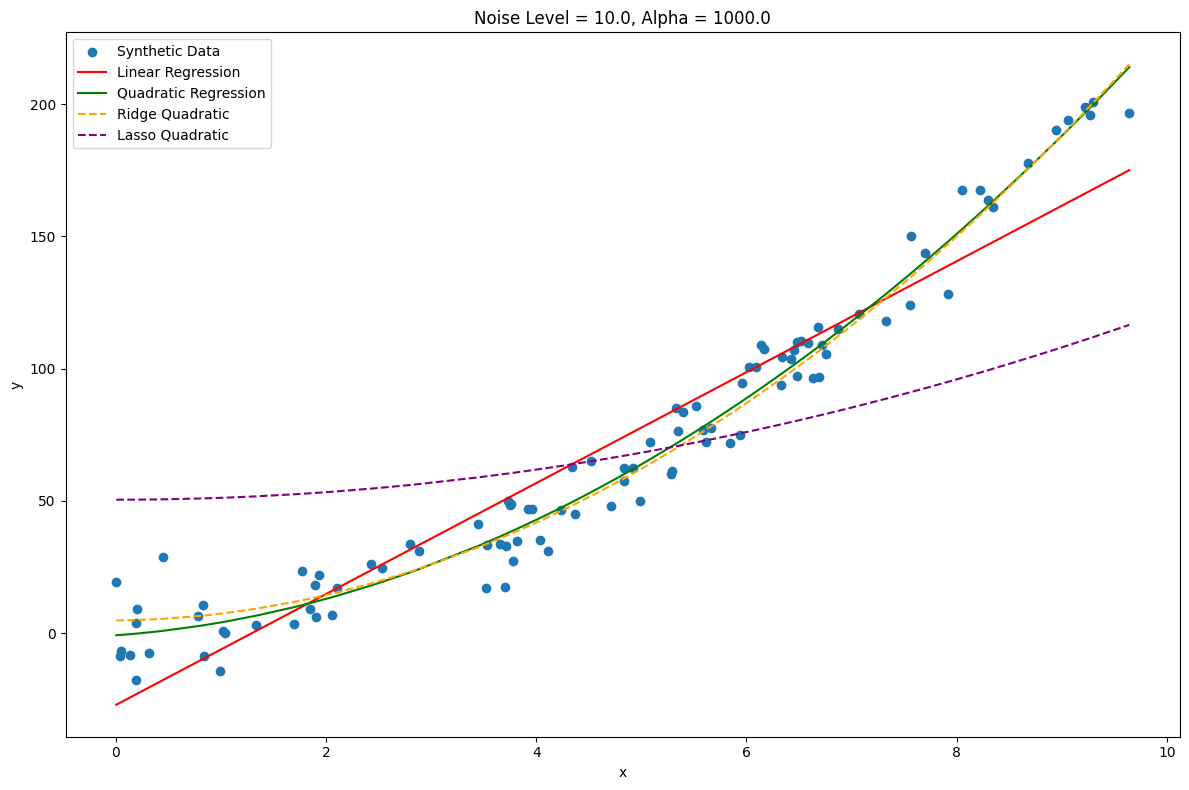

In [19]:
# Task 2: Polynomial Regression and Regularization
# This section uses a large alpha for the Ridge and Lasso models

from sklearn.linear_model import Ridge, Lasso

# For this task, we'll only use one noise level
noise = 10.0
# And, we'll only use one large alpha value
large_alpha = 1000.0

# Initialize plot
pp.figure(figsize=(12, 8))

# Generate data
X, y = generate_quadratic_data(100, noise)

# Create 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear model
linear_model = LinearRegression()
# Fit the linear model
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Create quadratic polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create an unregularized quadratic model
quadratic_model = make_pipeline(poly_features, LinearRegression())
# Fit the quadratic model
quadratic_model.fit(X_train, y_train)
# Predict on the test set
y_pred_quadratic = quadratic_model.predict(X_test)
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)


# RIDGE REGRESSION
# Objective: ||Xw - y||^2 + alpha*||w||^2

# Create a ridge model with a large alpha
ridge_model = make_pipeline(poly_features, Ridge(alpha=large_alpha))
# Fit the ridge model
ridge_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_ridge = ridge_model.predict(X_test)
# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


# LASSO REGRESSION
# Objective: (1/(2*N))*||Xw - y||^2 + alpha*|w|

# Create a lasso model with a large alpha
lasso_model = make_pipeline(poly_features, Lasso(alpha=large_alpha))
# Fit the lasso model
lasso_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_lasso = lasso_model.predict(X_test)
# Calculate mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print results
print(f"Noise Level = {noise}")
print(f"  Linear Model MSE = {mse_linear:.4f}")
print(f"  Quadratic Model MSE = {mse_quadratic:.4f}")
print(f"  Ridge Regression MSE = {mse_ridge:.4f}")
print(f"  Lasso Regression MSE = {mse_lasso:.4f}\n")

# Plot data and regression lines
pp.scatter(X, y, label='Synthetic Data')
pp.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
pp.plot(X, quadratic_model.predict(X), color='green', label='Quadratic Regression')
pp.plot(X, ridge_model.predict(X), color='orange', linestyle='dashed', label='Ridge Quadratic')
pp.plot(X, lasso_model.predict(X), color='purple', linestyle='dashed', label='Lasso Quadratic')
pp.title(f"Noise Level = {noise}, Alpha = {large_alpha}")
pp.xlabel('x')
pp.ylabel('y')
pp.legend()
pp.tight_layout()
pp.show()


**Task 2 Summary**

* How does regularization affect the model coefficients?

Ridge regression and lasso regression are regularized regression models, where larger values of alpha imply more regularization. The norm of the weight vector will be smaller (L2 norm for ridge regression, L1 norm for lasso regression). So, the coefficients will tend to be smaller in magnitude.


* What happens if you choose a very large value for alpha?

The coefficients will be very small in magnitude compared to the unregularized model. The regularized model will tend to underfit the training data. It will have low variance over different train/test splits of the data, but its bias will be high. As can be seen above, the Ridge regression model is not much different from the unregularized quadratic model. However, the Lasso regression is a much worse fit. We can see why if we compare the objective functions:

Ridge regression objective function:

||Xw - y||^2 + alpha*||w||^2

Lasso regression objective function:

(1/(2*N))*||Xw - y||^2 + alpha*|w|

In the Lasso regression, the term (1/(2*N))*||Xw - y||^2 tends to be very small for large N. The second term alpha*|w| dominates, and so minimizing the weight vector w makes a much greater contribution to minimizing the objective.



# Task 3: Classification Using Real Data

In this task, we fit several kernel support vector machine models to the Breast Cancer Wisconsin dataset. We compare the performance of a Gaussian kernel, a linear kernel, and several polynomial kernels.

This dataset consists of 569 datapoints, each with 30 features. Each datapoint represents a tumor, and it is labelled as either "benign" or "malignant". The names of the features are printed out below. They consist of various measurements of the tumors. The goal of this task is to train a SVM model which classifies tumors correctly based on their features. No preprocessing is done to the dataset except to standardize the feature values.

In [16]:
# Task 3: Classification Using Real Data

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

data = load_breast_cancer()
X = data.data
y = data.target

# Print out the names of the features
print("List of Features:")
print(data['feature_names'])
print()

# Generate 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# We will make models with several kernels:
# RBF (Gaussian); Linear; and Polynomial of Degrees 2, 3, 4, 5
# We let RBF have "degree" 0
kernel_degrees = [0, 1, 2, 3, 4, 5]
# Train a SVM model for each kernel type
for kernel_degree in kernel_degrees:
    if kernel_degree == 0:
        kernel_type = 'rbf'
        print("Gaussian Kernel:")
    elif kernel_degree == 1:
        kernel_type = 'linear'
        print("Linear Kernel:")
    else:
        kernel_type = 'poly'
        print(f"Degree {kernel_degree} Polynomial Kernel:")
    # Create the kernel SVM model
    # Degree is ignored for RBF and linear kernels
    kernel_SVM = make_pipeline(StandardScaler(), SVC(kernel = kernel_type, degree = kernel_degree))
    # Fit the model to the data
    kernel_SVM.fit(X_train, y_train)
    # Calculate predicted labels
    y_predict = kernel_SVM.predict(X_test)

    # Assemble test results
    test_results = list(zip(y_predict, y_test))
    # Count numbers of correct and wrong test labels
    num_correct = 0
    num_wrong = 0
    for predict, test in test_results:
        if predict == test:
            num_correct += 1
        else:
            num_wrong += 1
    # Calculate the % rate of correct labels
    percent_correct = num_correct/len(test_results)
    # Print out results
    print(f"    Labels Predicted Correctly: {num_correct}/{len(test_results)}")
    print(f"    Percent Labeled Correctly = {percent_correct: .1%}")


List of Features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Gaussian Kernel:
    Labels Predicted Correctly: 111/114
    Percent Labeled Correctly =  97.4%
Linear Kernel:
    Labels Predicted Correctly: 111/114
    Percent Labeled Correctly =  97.4%
Degree 2 Polynomial Kernel:
    Labels Predicted Correctly: 95/114
    Percent Labeled Correctly =  83.3%
Degree 3 Polynomial Kernel:
    Labels Predicted Correctly: 107/114
    Percent Labeled Correctly =  93.9%
Degree 4 Polynomial Ker

**Task 3 Summary**

We have trained six different kernel SVM models. As seen above, the Gaussian kernel and the Linear kernel perform with a high accuracy. The Polynomial kernels of degrees 2 and higher tend to perform worse than the Gaussian and Linear kernels. We can explain the bad performance of the polynomial kernels by considering what a polynomial kernel function does. The general form of a polynomial kernel function is:

k(x, y) = (<x, y> + c)^d,

where <x, y> is the dot product of x and y, c is a non-negative constant, and d is a positive integer.

If x and y are n-dimensional vectors, then when (<x, y> + c)^d is expanded and like terms are collected, it forms a sum of "(d + n) choose d" terms. Each of these terms is a multiplicative function of features. So, the kernel essentially is creating new features. Given 30 features and 569 datapoints, the number of new features quickly expands beyond the size of our dataset:

d = 2 -> 32!/(2!*30!) = 496

d = 3 -> 33!/(3!*30!) = 5,456

d = 4 -> 34!/(4!*30!) = 46,376

d = 5 -> 35!/(5!*30!) = 324,632

As a consequence, polynomial kernels will tend to overfit a small dataset. They are suited only for very large datasets.